In [28]:
from matplotlib import pyplot as plt
import numpy as np

# Those are the libraries used for the animation
import os 
import pickle as pkl

# Recursive Tree

In [29]:
def RecursiveTree(x:float,y:float,currentAngle:float,depth:int,lenght=10.0, theta=np.pi/4, reductionFactor=0.6):
    if depth == 0:
        return
    else:
        x1 = x + lenght*np.cos(currentAngle) 
        y1 = y + lenght*np.sin(currentAngle)

        plt.plot([x,x1],[y,y1],color='white')

        # left branch
        RecursiveTree(x1,y1,currentAngle+theta,depth-1,lenght*reductionFactor,theta)
        # right branch
        RecursiveTree(x1,y1,currentAngle-theta,depth-1,lenght*reductionFactor,theta)

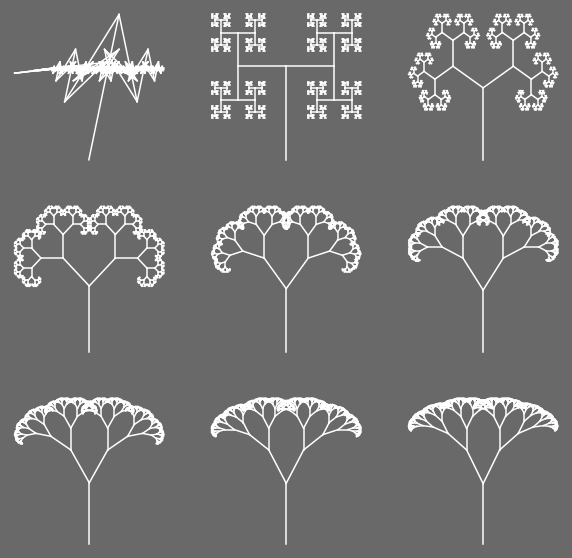

In [30]:
plt.figure(figsize=(10,10),facecolor='dimgray')
# in order to have a vertical tree, we need to rotate the initial angle by 90 degrees
initalAngle = np.pi/2
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.axis('off')
    RecursiveTree(0,0,initalAngle,10,10,np.pi/i)

# plt.savefig('RecursiveTree.png',dpi=300,bbox_inches='tight')
plt.show()


# Animation

In [31]:
import matplotlib.animation as animation

In [32]:
def RecursiveTreeAnimation(x:float,y:float,currentAngle:float,depth:int,lenght=10.0, theta=np.pi/4, reductionFactor=0.6):
    if depth == 0:
        return
    else:
        x1 = x + lenght*np.cos(currentAngle) 
        y1 = y + lenght*np.sin(currentAngle)

        fig = plt.gcf() # recuperation de la figure courante
        ax = fig.gca() # recuperation de l'axe courant

        ax.plot([x,x1],[y,y1],color='white')
        RecursiveTreeAnimation(x1,y1,currentAngle+theta,depth-1,lenght*0.6,theta)
        RecursiveTreeAnimation(x1,y1,currentAngle-theta,depth-1,lenght*0.6,theta)

In [ ]:
bnFrames = 150
fig = plt.figure(figsize=(10,10), dpi=100, facecolor='dimgray')

def animate(i):
    plt.clf() # clear the current figure
    theta = np.pi * ((i+1) / (bnFrames+1))
    initalAngle = np.pi/2
    ax  = fig.gca()
    # ax.text(0.95, 0.05, f"theta (Rad) = {theta:.2f}", transform=ax.transAxes, fontsize=14, horizontalalignment='right', verticalalignment='bottom', \
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.axis('off')
    RecursiveTreeAnimation(0,0,initalAngle,10,10,theta)
    
    return ax

ani = animation.FuncAnimation(fig, animate, frames = bnFrames, interval=300, repeat=True )
# ani.save('RecursiveTreeNoQuote.gif', bitrate=4000, fps=30)

# Generate a tree with the L-system

## Generate a String with the L-system

In [34]:
def GenerateSentences(rules:dict, generations:int, currentSentence:str):
    if generations == 0:
        return currentSentence
    else:
        nextSentence = ''
        for char in currentSentence:
            if char in rules:
                nextSentence += rules[char]
            else:
                nextSentence += char
    # print(f"{generations = }: {currentSentence}")
    return GenerateSentences(rules, generations-1, nextSentence)    

In [35]:
rules = {'F':"FF+[+F-F-F]-[-F+F+F]"}
axiom = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, axiom)
print("First 100 characters of the sentence: ")
print(sentence[:100])

First 100 characters of the sentence: 
FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F


## Generate a Tree from the String

In [36]:
def RecursiveTreeWithLSystem(sentence:str,saveParam=None):
    x = 0; y = 0
    theta = np.radians(345)
    lenght = 1
    currentAngle = np.pi/2
    # the stack is used to save the position where we go to left when a '[' is encountered
    # and to restore it when a ']' is encountered to go back to the right
    stack = []
    nbF = 0
    for char in sentence:
        
        # print(f"{stack = }, {char = }")
        
        # This part is only used to save the position of the turtle at each 'F' caracter for the animation
        if saveParam is not None and char == 'F':
            nbF += 1
            if not os.path.exists(saveParam[:saveParam.rfind('/')]):     # vérification de l'existence du dossier
                 os.makedirs(saveParam[:saveParam.rfind('/')])           # création du dossier
            pkl.dump({'x':x,'y':y, 'currentAngle':currentAngle},open(f"{saveParam}{nbF}.pkl",'wb'))

        # Here the code is only meant to work with a specific Alphabet ( set of caracter )
        if char == 'F':
            x1 = x + lenght*np.cos(currentAngle) 
            y1 = y + lenght*np.sin(currentAngle) 

            plt.plot([x,x1],[y,y1],color='white')

            x = x1; y = y1
            # lenght *= 0.999
        elif char == '+':
            currentAngle += theta
        elif char == '-':
            currentAngle -= theta
        elif char == '[':
            stack.append([x,y,currentAngle])
        elif char == ']':
            x,y,currentAngle = stack.pop()
        
        

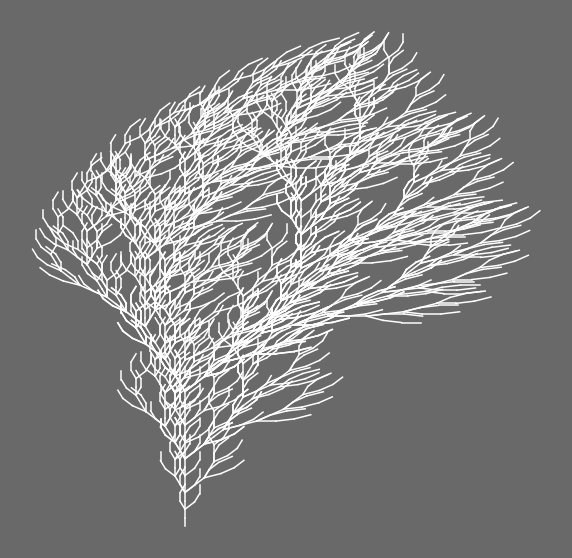

In [37]:
plt.figure(figsize=(10,10),facecolor='dimgray')
plt.axis('off')
RecursiveTreeWithLSystem(sentence)

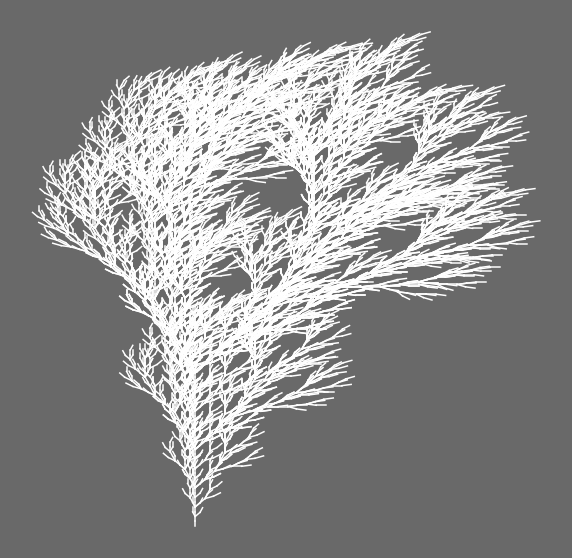

In [38]:
# Generate the senstence
rules = {'F':"FF+[+F-F-X]-[-F+F+X]",'X':"F-[[X]+X]+F[+FX]-X"}
sentence = 'F'
generations = 5
sentence = GenerateSentences(rules, generations, sentence)

#  Generate the Tree
# print(sentence)
plt.figure(figsize=(10,10), facecolor='dimgray')
plt.axis('off')
RecursiveTreeWithLSystem(sentence)
# plt.savefig('RecursiveTreeWithLSystem2.png',dpi=300,bbox_inches='tight')

## Generate a Tree from the String and Adding Randomness

In [39]:
def RecursiveTreeWithLSystemRandomAngle(sentence:str,randomVector:list):
    # Settings 
    x = 0; y = 0
    theta = np.radians(np.random.randint(*randomVector))
    lenght = 1
    currentAngle = np.pi/2
    stack = []
    for char in sentence:
        # print(f"{stack = }, {char = }")
        if char == 'F':
            x1 = x + lenght*np.cos(currentAngle) 
            y1 = y + lenght*np.sin(currentAngle) 
            plt.plot([x,x1],[y,y1],color='white')
            x = x1
            y = y1
            # lenght *= 0.999
        elif char == '+':
            currentAngle += theta
            # For each '+' caracter we change the angle of rotation
            theta = np.radians(np.random.randint(*randomVector))
        elif char == '-':
            # Same for '-'
            currentAngle -= theta
            theta = np.radians(np.random.randint(*randomVector))
        elif char == '[':
            stack.append([x,y,currentAngle])
        elif char == ']':
            x,y,currentAngle = stack.pop()

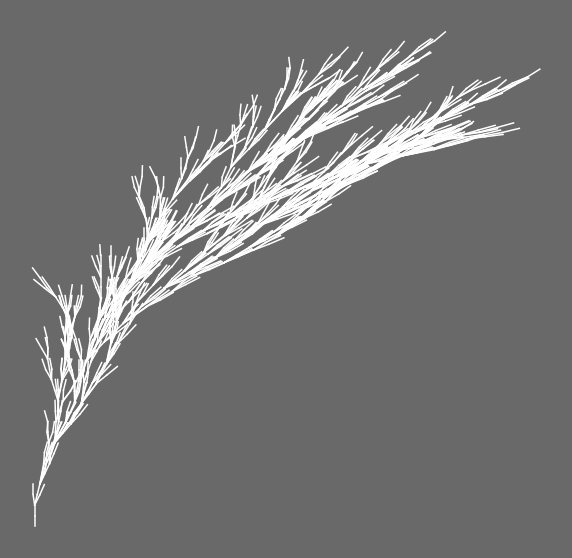

In [40]:
rules = {'F':"FF+[+F-F-X]-[-F+F+X]",'X':"F-[[X]+X]+F[+FX]-X"}
sentence = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, sentence)

# print(sentence)

plt.figure(figsize=(10,10), facecolor='dimgray')
plt.axis('off')
vector = (0,10)
RecursiveTreeWithLSystemRandomAngle(sentence, vector)
# plt.savefig('RecursiveTreeWithLSystem3.png',dpi=300,bbox_inches='tight')

In [41]:
vectors = np.concatenate((np.arange(0,360,10),np.arange(10,370,10))).reshape(2,-1).T
print(vectors.shape)

(36, 2)


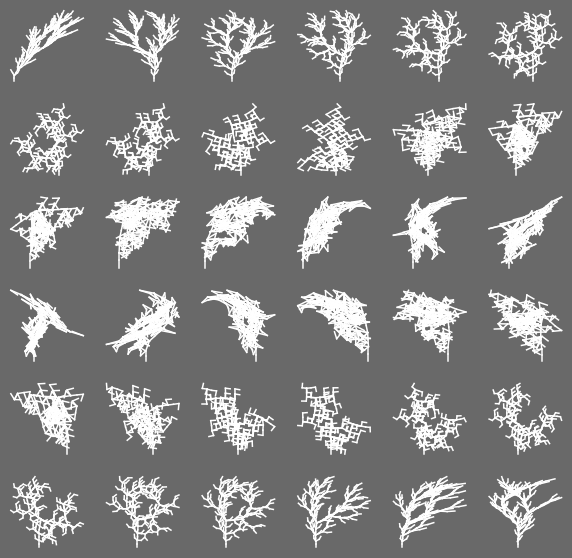

In [42]:
rules = {'F':"FF+[+F-F-X]-[-F+F+X]",'X':"F-[[X]+X]+F[+FX]-X"}
axiom = 'F'
generations = 3
sentence = GenerateSentences(rules, generations, axiom)

vectors = np.concatenate((np.arange(0,360,10),np.arange(10,370,10))).reshape(2,-1).T

plt.figure(figsize=(10,10), facecolor='dimgray')
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.axis('off')
    RecursiveTreeWithLSystemRandomAngle(sentence, vectors[i-1])

# plt.savefig('RecursiveTreeWithLSystem4.png',dpi=300,bbox_inches='tight')
plt.show()

# Animation

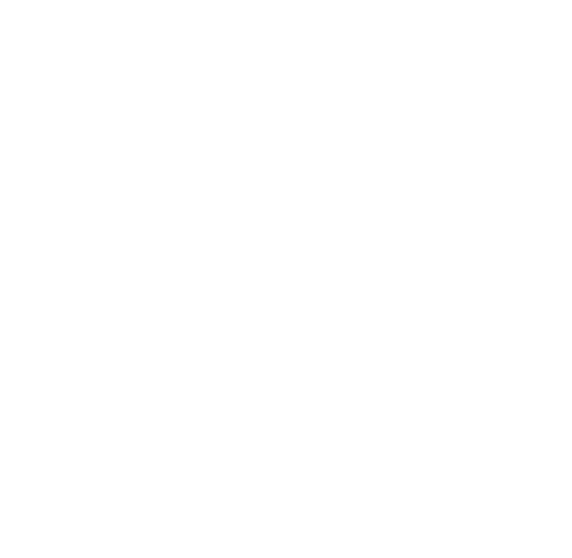

In [43]:
rules = {'F':"FF+[+F-F-F]-[-F+F+F]"}
axiom = 'F'
generations = 4
sentence = GenerateSentences(rules, generations, axiom)

plt.figure(figsize=(10,10))
plt.axis('off')
RecursiveTreeWithLSystem(sentence,saveParam='params/faithful')


In [ ]:
nbiter = sentence.count('F')
fig = plt.figure(figsize=(10,10), dpi=100, facecolor='dimgray')
plt.axis('off')
plt.xlim(-9,20)
plt.ylim(-0.5,62)

data = {'x':0,'y':0,'currentAngle':np.pi/2,'stack':[],'lenght':1}

def animate(i):
    fig = plt.gcf() # recuperation de la figure courante
    ax = fig.gca() # recuperation de l'axe courant

    params_path = 'params'
    fname = 'faithful'

    data = pkl.load(open(params_path+"/"+fname+str(i+1)+".pkl","rb")) # récupération d'un dictionnaire
    x = data['x']
    y = data['y']
    currentAngle = data['currentAngle']
    lenght = 1

    x1 = x + lenght*np.cos(currentAngle) 
    y1 = y + lenght*np.sin(currentAngle) 
    ax.plot([x,x1],[y,y1],color='white')
    
    return ax

ani = animation.FuncAnimation(fig, animate, frames = nbiter, interval=100, repeat=True)
# ani.save('LSystemTree4.gif', bitrate=4000, fps=45)